# Canny Edge Detection

Canny edge detection is a multi-step algorithm that can detect edges. This algorithm consist of four stages

1.Noise Reduction

2.Gradient Computation

3 Non Max Supression

4 Hysteresis Thresholding



## 1. Noise Reduction

Since edge detection is sensitive towards noise so the first step is to remove the noise in the image with Gaussian filter. We have already seen Gaussian Filter in details

## 2. Gradient Computation

Edges correspond to a change of pixels’ intensity. To detect it, the easiest way is to apply filters that highlight this intensity change in both directions: horizontal (x) and vertical (y)

So in this step 2-D first derivative operator like sobel operator is applied to the Smoothend image in both horizental as well as Vertical direction to get the first derivative  in horizontal direction (G_x) and vertical direction (G_y) to highlight regions of the image with high first spatial derivatives. Edges give rise to ridges in the gradient magnitude image.

The Gradient Computation detects the edge intensity and direction by calculating the gradient.

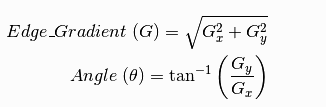

## 3. Non Max Suppression

So After doing gradient computation steps the edges thickness is not uniform. Some of edges are thick and thins and also there are  unwanted pixels which may not constitute images, So to overcome this issue non max suppression is used.

In this step , at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient.
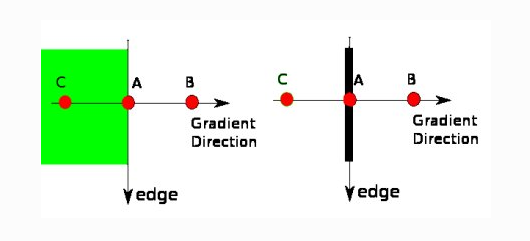

As we see here in the image, point A is on the edge and point B and C are on the gradient direction. Since gradient direction is always perpendicular to the edge.

So point A is checked with point B and C . if it forms a local maximum, it is considered for next stage, otherwise, it is suppressed i.e the pixel value put to zero

**In simple word**

$I(m,n)$ is an image then if $I(m,n)$  is greater than its two neighbors along the gradient direction $\theta(m,n)$. If so, keep $I(m,n)$ unchanged, otherwise, set it to 0. 

## 4. Hysteresis Thresholding

This step is used to identify  pixels which are all contributing to the edges are really edges and which are not.

So to do this we need to have two threshold T1(High Threshold) and T2(Low Threshold).

1.Any edges with intensity gradient more than High threshol are sure to be edges.

2.Any edges below minVal are sure to be non-edges, so discarded. 

3.Those who lie between these two thresholds are classified edges or non-edges based on their connectivity.
 i.e if they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. 
 
 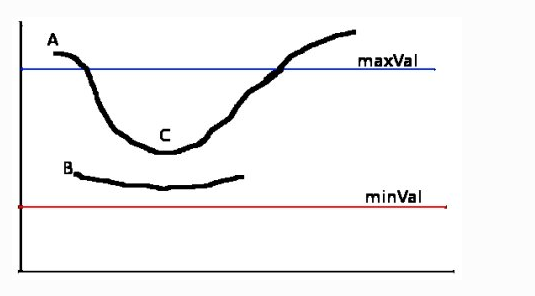

Lets take an example to understand it clearly.

1.The edge A is above the High Threshold(T1). so it is considered as “sure-edge”. 

2.Although edge C is below High THreshold, it is connected to edge A. so that also considered as valid edge and we get that full curve. 

3.Although Edge B is above Low Threshold and is in same region as that of edge C, it is not connected to any “sure-edge”, so that is discarded. So it is very important that we have to select Low Threshold and High Threhold accordingly to get the correct result.



**Note**: **The canny edge detector algorithm is based on grayscale pictures.**

## Some important point 

** So now we know that ,the effect of the Canny operator is determined by three parameters

      1.the width of the Gaussian kernel used in the smoothing phase

      2. the upper and lower thresholds used by the tracker. 


A. So if we increse the width of the Gaussian kernel
    1. Then it reduces the detector's sensitivity to noise, at the expense of losing some of the finer detail    in  the image.
    2.The localization error in the detected edges also increases slightly as the Gaussian width is increased.

B.The upper tracking threshold can be set quite high, and the lower threshold quite low for good results. 

    1.Setting the lower threshold too high will cause noisy edges to break up. 

    B.Setting the upper threshold too low increases the number of spurious and undesirable edge fragments appearing in the output. 

# OpenCV has a function cv2.Canny()  to do edge detection¶

## <font color="Green"><h4 align="left">Syntax</h4></font>


**cv2.Canny(image, edges, Low_Threshold,High_Threhold, apertureSize,L2gradient )**

**Parameters**

   **image** −input image for this operation.

   **edges** −It represents the destination (edges) for this operation.

   **Low_Threshold** − It represents the Low threshold for the hysteresis procedure.
    
   **High_Threshold** − It represents the High threshold for the hysteresis procedure.
    
   **apertureSize** – aperture size for the Sobel() operator.It is the size of Sobel kernel used for find image gradients. By default it is 3. 

   **L2gradient** :L2gradient which specifies the equation for finding gradient magnitude. 
    
    If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G) = |G_x| + |G_y|. By default, it is False.
    



# Importing opencv library

In [1]:
import cv2

In [6]:
#read image
img=cv2.imread("lena.png")

In [10]:
#Display image
window_name='imagefirst'
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name,img)
cv2.waitKey(0)
cv2.destroyAllWindows()


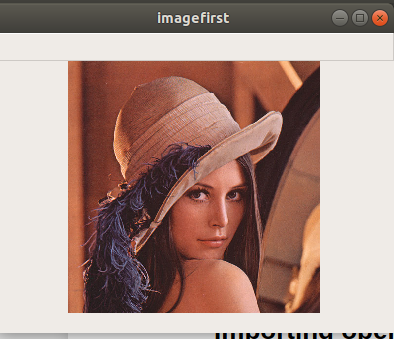

### Since opencv cv2.canny() function doesnot do gaussian blurring for us so we have to do gaussian blurring first.

In [12]:
#Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(img,(5,5),sigmaX=0)

In [13]:
#Display image
window_name='Gaussian_Blur'
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name,gaussian_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()


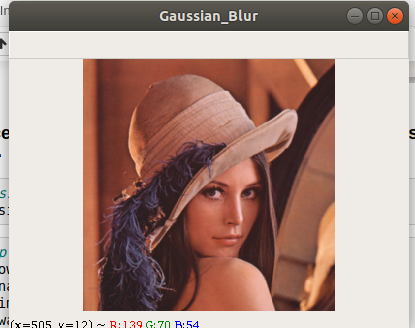

In [14]:
#Canny Edge Detector
edges = cv2.Canny(gaussian_blur,100,200)





In [17]:
#Display image
window_name='Gaussian_Blur'
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name,edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


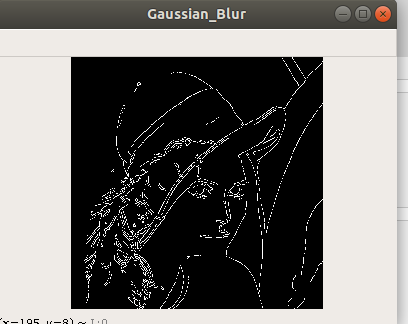